In [1]:
#neccesarry imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('cancer_reg.csv')       # Reading the data file

In [3]:
df.head()                               # checking the first five rows from the dataset

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


What are the **features**?

- avgAnnCount: Mean number of reported cases of cancer diagnosed annually

- avgDeathsPerYear: Mean number of reported mortalities due to cancer

- incidenceRate: Mean per capita (100,000) cancer diagoses

- medianIncome: Median income per county 

- popEst2015: Population of county 

- povertyPercent: Percent of populace in poverty 

- studyPerCap: Per capita number of cancer-related clinical trials per county 

- binnedInc: Median income per capita binned by decile 

- MedianAge: Median age of county residents 

- MedianAgeMale: Median age of male county residents 

- MedianAgeFemale: Median age of female county residents 

- Geography: Country name 

- AvgHouseholdSize: Mean household size of county 

- PercentMarried: Percent of county residents who are married 

- PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

- PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

- PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

- PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

- PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

- PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

- PctEmployed16_Over: Percent of county residents ages 16 and over employed 

- PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

- PctPrivateCoverage: Percent of county residents with private health coverage 

- PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

- PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

- PctPublicCoverage: Percent of county residents with government-provided health coverage 

- PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

- PctWhite: Percent of county residents who identify as White 

- PctBlack: Percent of county residents who identify as Black 

- PctAsian: Percent of county residents who identify as Asian 

- PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

- PctMarriedHouseholds: Percent of married households 

- BirthRate: Number of live births relative to number of women in county 

What is the **Label/Target**?
- TARGET_deathRate : Mean per capita (100,000) cancer mortalities




In [4]:
df.info()               #Checking all information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [5]:
df.describe()  #Full description of data with five points of summary

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [6]:
df.isnull().sum()     #Checking Null values.

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

- From above observation we can tell that the three features with missing data are: PctSomeCol18_24, PctEmployed16_Over, PctPrivateCoverageAlone.

# Handling Missing Values

When evaluating missing values, we're presented with a few choices of what to do:

- Do nothing
- Imputation
- Replace with zeros or some other constant
- Drop the feature or observations with missing values

There are many pros/cons to each of these, and require a deeper understanding of the overall impact based on your decision. This should not be taken lightly. So, we're going to impute the missing values (below 1000) using the mean of the feature and droping values which are above 1000.


In [7]:
#Dropping the columns with missing value percentage greater than 30%.
df.drop('PctSomeCol18_24', axis = 1, inplace = True)

In [8]:
#impute the missing values (below 1000)
df.fillna(df.mean(),inplace=True)

In [9]:
df.isnull().sum()   #Checking null values after handling

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

#### From above observation we that can say we don't have any missing value in dataset. 

In [10]:
df.shape

(3047, 33)

In [11]:
df.corr()   #Checking the columns with highest correlation with Target column.

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,...,0.166674,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,...,0.112221,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,...,-0.326067,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,...,0.098846,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,...,0.706956,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,...,0.121365,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,...,-0.682760,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,...,0.068599,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
MedianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,...,-0.021466,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
MedianAgeMale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,...,-0.147824,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


<AxesSubplot:>

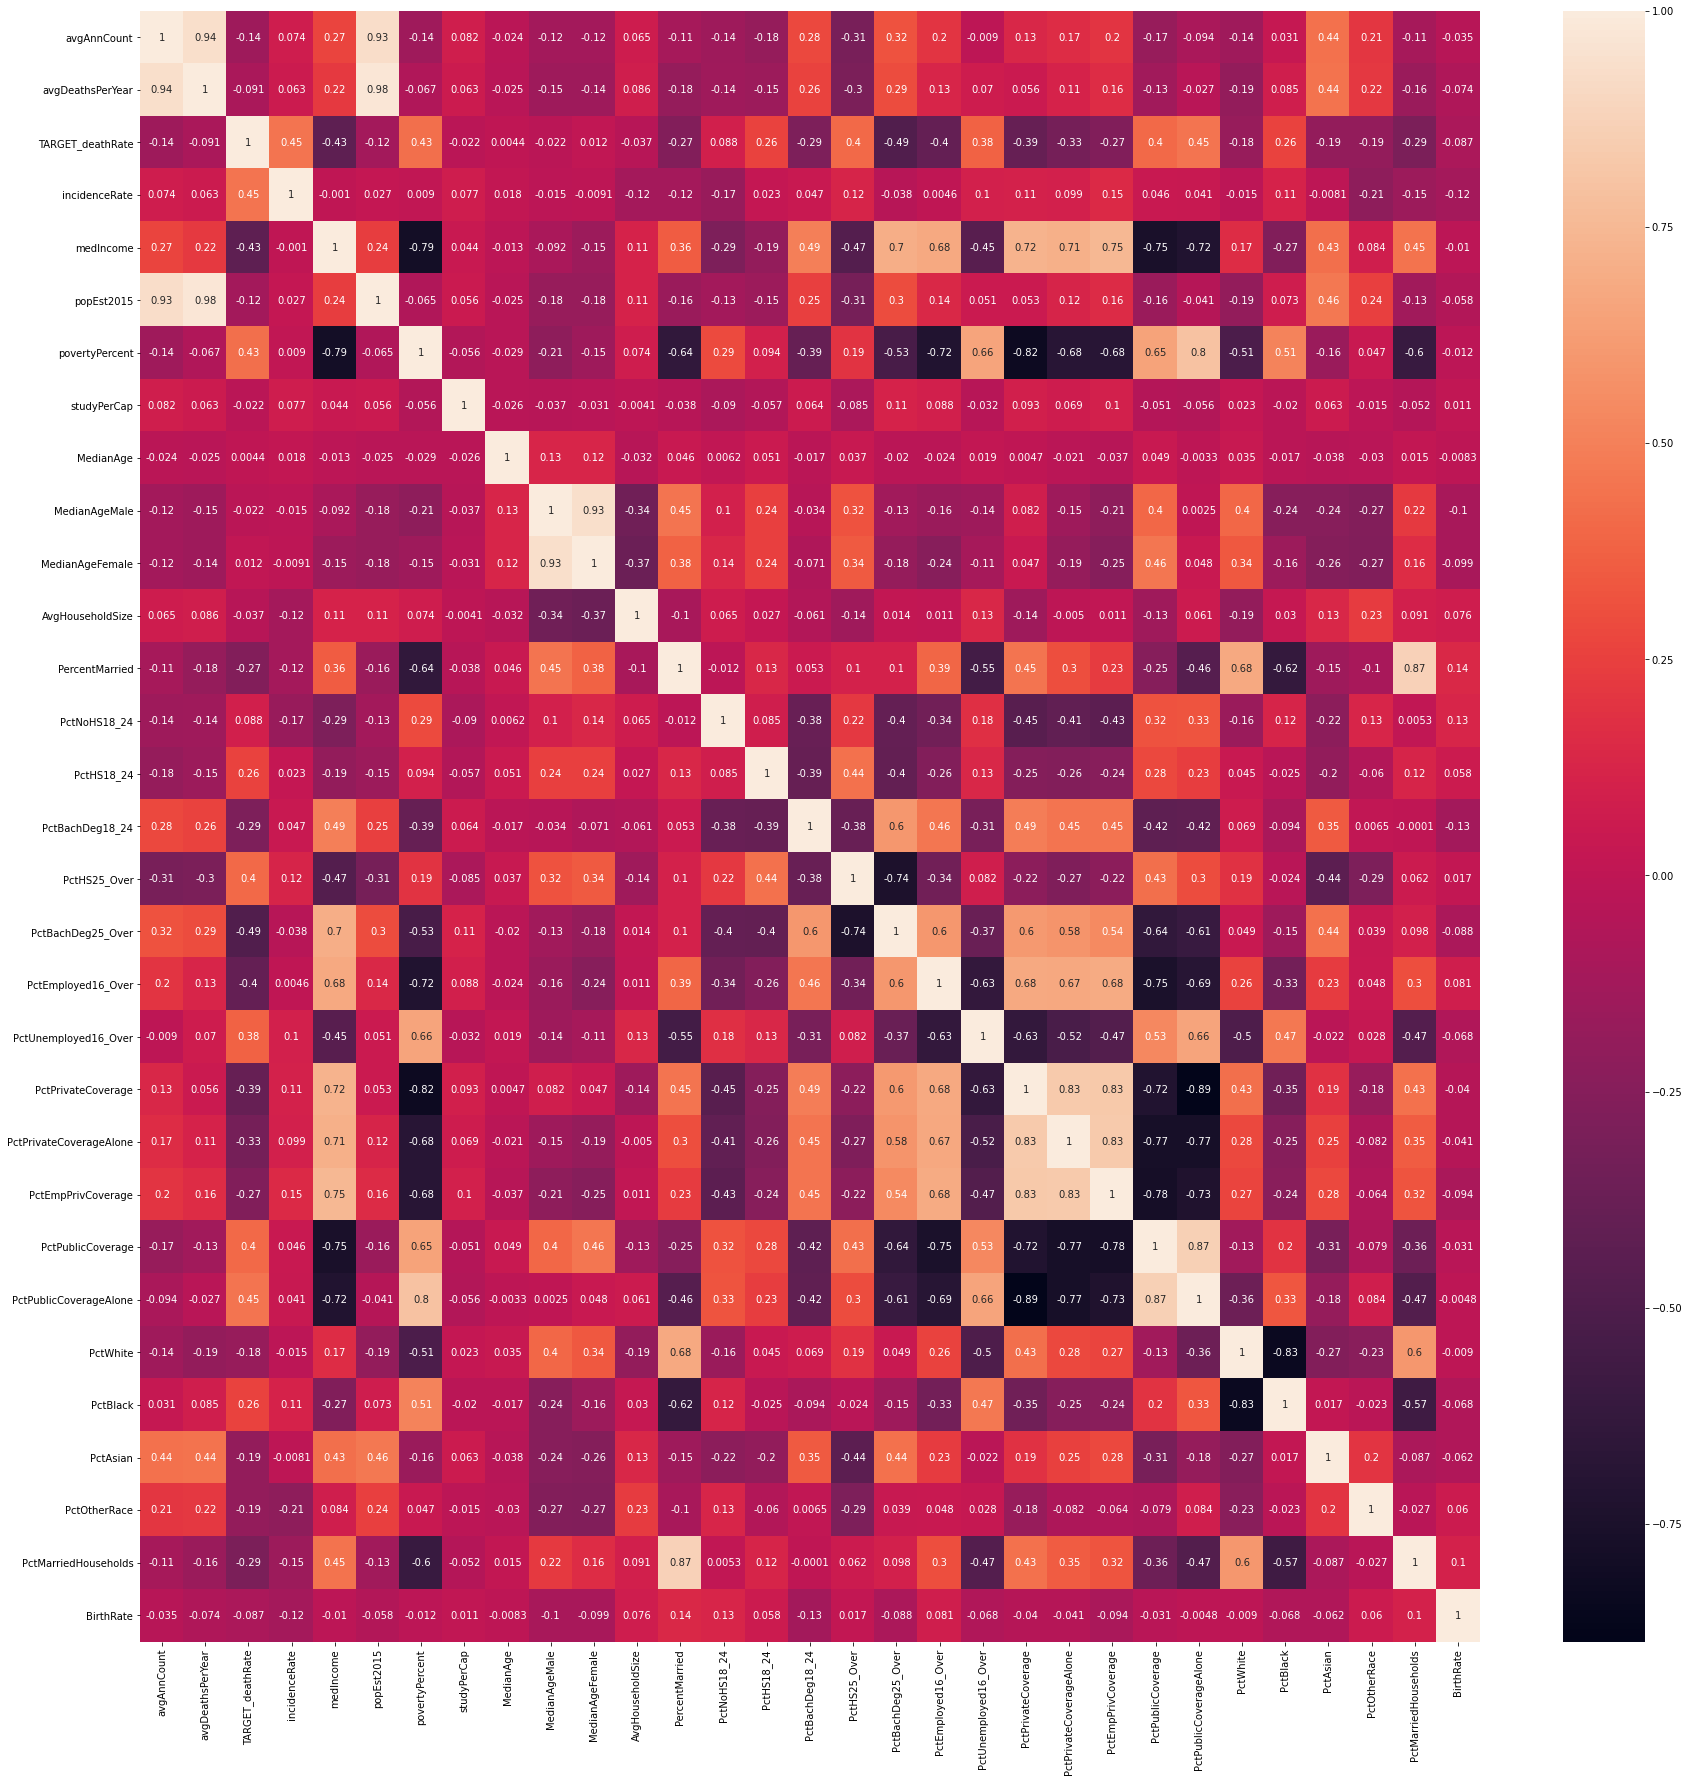

In [12]:
plt.subplots(figsize=(30,30));
sns.heatmap(df.corr(),annot=True)

# Exploring Correlations

Above observation shows us that our top three correlated variables are incidencerate, pctpubliccoveragealone, and povertypercent. As a quick reminder of what these mean:

- incidencerate: Mean per capita (100,000) cancer diagoses

- povertypercent: Percent of populace in poverty

- pctpubliccoveragealone: Percent of county residents with government-provided health coverage alone

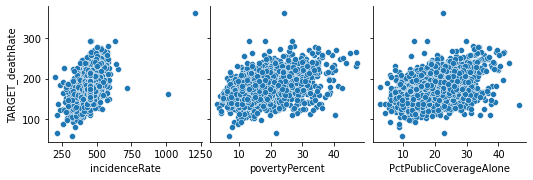

In [13]:
sns.pairplot(data = df, y_vars=['TARGET_deathRate'], x_vars=['incidenceRate','povertyPercent','PctPublicCoverageAlone']);

In [14]:
print(df['incidenceRate'].corr(df['TARGET_deathRate']))
print(df['povertyPercent'].corr(df['TARGET_deathRate']))
print(df['PctPublicCoverageAlone'].corr(df['TARGET_deathRate']))

0.4494316975614455
0.4293889802564506
0.44935757578533275


# Linear Regression Model Training

In [36]:
X = df[['incidenceRate','povertyPercent','PctPublicCoverageAlone']]
y = df['TARGET_deathRate']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
lr.score(X_train, y_train)

0.41276662899340455

In [44]:
y_predict = lr.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
mse = mean_squared_error(y_test, y_predict)

In [48]:
print('Linear Regression MSE:', mse)

Linear Regression MSE: 467.21701933590776


In [49]:
from sklearn import metrics

In [50]:
# make prediction with the fitted model
linear_pred = lr.predict(X_test) 

# score the model on the train set
print('Train score: {}\n'.format(lr.score(X_train,y_train)))

# score the model on the test set
print('Test score: {}\n'.format(lr.score(X_test,y_test)))

# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))

# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Train score: 0.41276662899340455

Test score: 0.3843667849745257

Overall model accuracy: 0.3843667849745257

Mean Squared Error: 467.21701933590776


# Testing Model with an example 

In [25]:
reg=linear_model.LinearRegression()
reg.fit(df[['incidenceRate','povertyPercent','PctPublicCoverageAlone']],df.TARGET_deathRate)

LinearRegression()

In [26]:
reg.coef_         #m1,m2,m3

array([0.2223114 , 0.9660897 , 1.15005384])

In [27]:
reg.intercept_   #b

40.575895009919094

In [ ]:
#predicting a random value
# incidencerate =520  povertypercent=30.1   pctpublicvoveragealone= 60.4

In [30]:
reg.predict([[520,30.1,60.4]])

array([254.72037585])

In [31]:
#TargetDeathratePredicted value is 254.72

In [33]:
#how predicted value is calculated      m1*x1 + m2*x2 + m3*x3 + b
0.2223114*520 + 0.9660897*30.1+1.15005384*60.4+40.575895009919094

254.7203749159191